In [1]:
import glob
import random
import datetime
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

In [2]:
%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

print("x_train.shape: {}", format(x_train.shape))

config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (x_train.shape[1],x_train.shape[2],1),
    'epochs': 100,
    'dropout': 0.5,
    'batch_size': 640,
    'l2': 0.05,
    'LSTM': True,
    'lr': 0.001
}

Shape of x_train set: (6960, 22, 250)
Shape of y_train labels: (6960,)
Shape of x_valid set: (1500, 22, 250)
Shape of y_valid labels: (1500,)
Shape of X_test_prep set: (1772, 22, 250)
Shape of y_test_prep labels: (1772,)
Shape of y_train labels after categorical conversion: (6960, 4)
Shape of y_valid labels after categorical conversion: (1500, 4)
Shape of y_test labels after categorical conversion: (1772, 4)
x_train.shape: {} (6960, 22, 250)


In [3]:
AvgPoolCNN = AvgPoolCNN()
AvgPoolCNN.build_model(config)
history = AvgPoolCNN.train(x_train, y_train, x_valid, y_valid, config, get_workpath('AvgPoolCNN'))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22, 250)]         0         
                                                                 
 reshape (Reshape)           (None, 22, 250, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 22, 241, 48)       528       
                                                                 
 batch_normalization (Batch  (None, 22, 241, 48)       192       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 22, 241, 48)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 241, 40)        42280     
                                                             

In [4]:
raw = AvgPoolCNN.evaluate(x_test, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better("AvgPoolCNN.pickle", np.mean(raw[1]), AvgPoolCNN, config)

56/56 [==============================] - 2s 35ms/step - loss: 1.6539 - accuracy: 0.6326
Raw Acc result: 0.6326184868812561
No existing model in specified path. Saving the new model


True

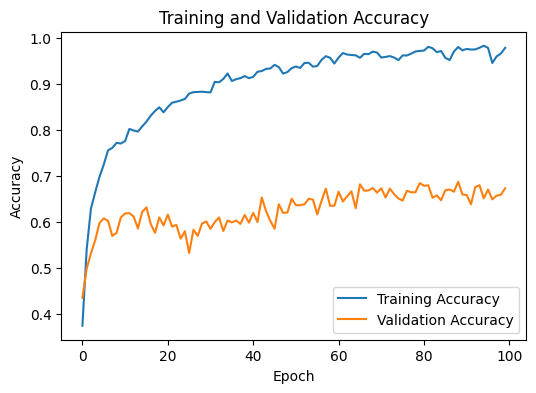

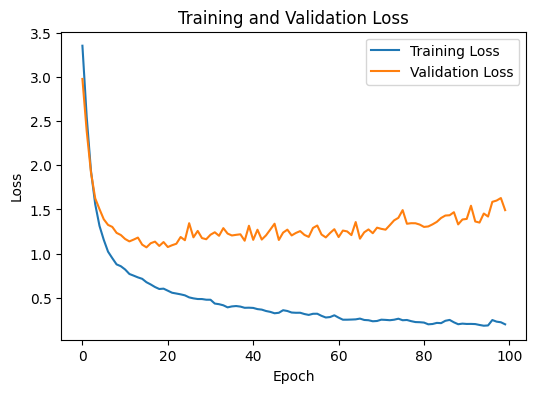

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()